To preprocess csnow data run the following from a terminal

```
conda create -n csnow gdal --yes
conda activate csnow
bash /home/jovyan/Assimilation/scripts/csnow.sh /home/jovyan/shared/data-knuth/csnow
```

In [1]:
import rasterio
from rasterio.plot import show
import contextily as ctx
import matplotlib.pyplot as plt 

#### clip to region of interest

In [2]:
%%capture

dem_fn_14     = '/home/jovyan/shared/data-knuth/csnow/SD_20181014.nc.tif'
dem_fn_14_out = '/home/jovyan/shared/data-knuth/csnow/SD_20181014_clip.tif'
!gdal_translate -projwin -130.0 55.0 -110.0 40.0 {dem_fn_14} {dem_fn_14_out}

dem_fn_15     = '/home/jovyan/shared/data-knuth/csnow/SD_20181015.nc.tif'
dem_fn_15_out = '/home/jovyan/shared/data-knuth/csnow/SD_20181015_clip.tif'
!gdal_translate -projwin -130.0 55.0 -110.0 40.0 {dem_fn_15} {dem_fn_15_out}

#### plot with basemap

In [3]:
url = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}'

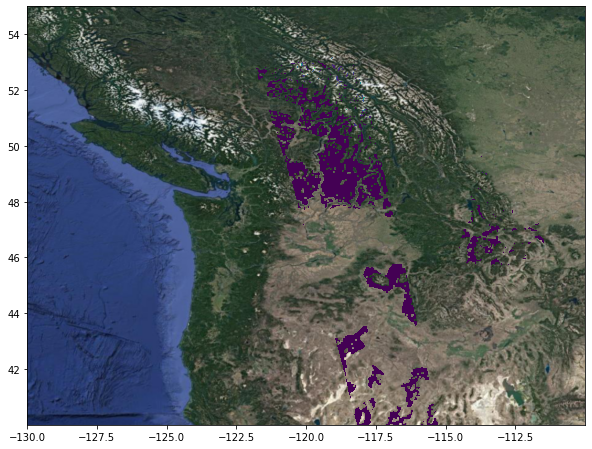

In [4]:
rasterio_dataset = rasterio.open(dem_fn_14_out)
spatial_extent = rasterio.plot.plotting_extent(rasterio_dataset)
fig, ax = plt.subplots(1,figsize=(10,10))
ax.imshow(rasterio_dataset.read(1, masked=True), extent=spatial_extent)
ctx.add_basemap(ax, crs='EPSG:4326', source=url)
ax.imshow(rasterio_dataset.read(1, masked=True), extent=spatial_extent)

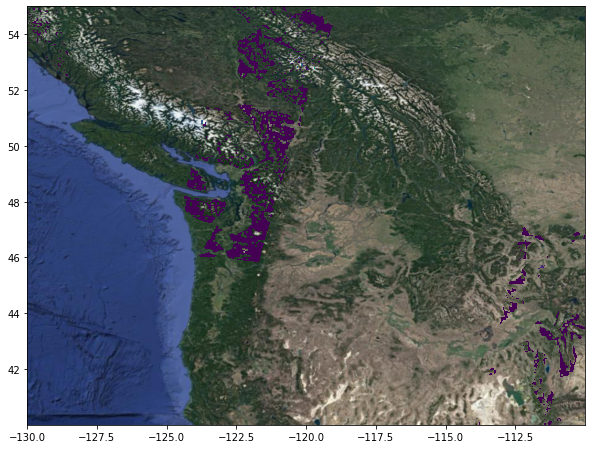

In [5]:
rasterio_dataset = rasterio.open(dem_fn_15_out)
spatial_extent = rasterio.plot.plotting_extent(rasterio_dataset)
fig, ax = plt.subplots(1,figsize=(10,10))
ax.imshow(rasterio_dataset.read(1, masked=True), extent=spatial_extent)
ctx.add_basemap(ax, crs='EPSG:4326', source=url)
ax.imshow(rasterio_dataset.read(1, masked=True), extent=spatial_extent)